<a href="https://colab.research.google.com/github/Danjstr/Auto-ML/blob/main/Auto_ML_FinalProject()_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project


## Research Question:

Can we effectively predict if a person has Lung Cancer?  We will be building two separate models? One Will be built here in python the other will be built in Altreyx and Datarobot. The results of these two models shall be compared here in this discussion.

## Introduction


Our health plays an important role in our daily life. The American Cancer Society's estimates for lung cancer in the United States for 2021 are About 235,760 new cases of lung cancer (119,100 in men and 116,660 in women) About 131,880 deaths from lung cancer (69,410 in men and 62,470 in women).

The health of hundreds of thousands of people in the future could be better improved by effectively developing models that predict when patients have lung cancer.

##Data to be Used 

The Data we use will be collected from the Kaggle website. 

https://www.kaggle.com/michaelbryantds/lung-cancer-survey-classification/data
https://www.kaggle.com/yusufdede/lung-cancer-dataset

The two separate datasets contain very little data. Combined they will give us less than 400 rows of data for us to perform predictions on. One dataset has primarily binary data. The other has numeric values that will be of value for our predictions.

Our target variable is Lung_Cancer.





### Approach

We will directly download both datasets to this Jupyter notebook and Altrex. In this notebook, we will be doing so from Github. While in Altreyx we will be using the import data tool to import them as csv. Both in Altreyx and in this notebook we shall be Focusing on adjusting the structure and format of the two datasets so we can combine them properly. This will include dripping certain columns in both permutations of our modeling. These adjustments will be done in code here in this notebook but will mostly be done with a string of formula tools in Altreyx.

After the data is properly combined we will then have to deal with many missing values. As we are adding datasets that do not have all the same columns we will have a lot of missing rows. We will be doing a k-nearest neighbor imputation in both permutations. Here it will be coded out. Likewise, we will be doing the same in Altrex using the python tool. This is one of the best features of Altreyx. If you run into limitations with the software you can simply code out the changes you want in a seamless fashion without exporting and reimporting the data. In this case, Altrex does not have an easy-to-use Nearest Neighbor imputation process so I coded it out.

From there we will be moving more directly into modeling. In this notebook, we shall be building three Knearestneighbor Classifiers and three XGboosted Classifiers. In Altrex we will be using the data robot tools to push our data into Autopilot on Datarobot so that we can run multiple models for comparison without individually coding them out. I built six models here in python they were all time-consuming builds. It took hours to set them up the way I wanted. Running the models through Datrobot on our other permutation yielded nearly twice as many models with a tenth of the actual effort. It was a very time-saving and rewarding experience.

Finally, We will be opening up the output of our Altryx test result run on the Datarobot training data in Tableau. We will be doing this to help visualize the data that returned from running our test set on the trained model. The Tableau dashboard is provided separately from this notebook.

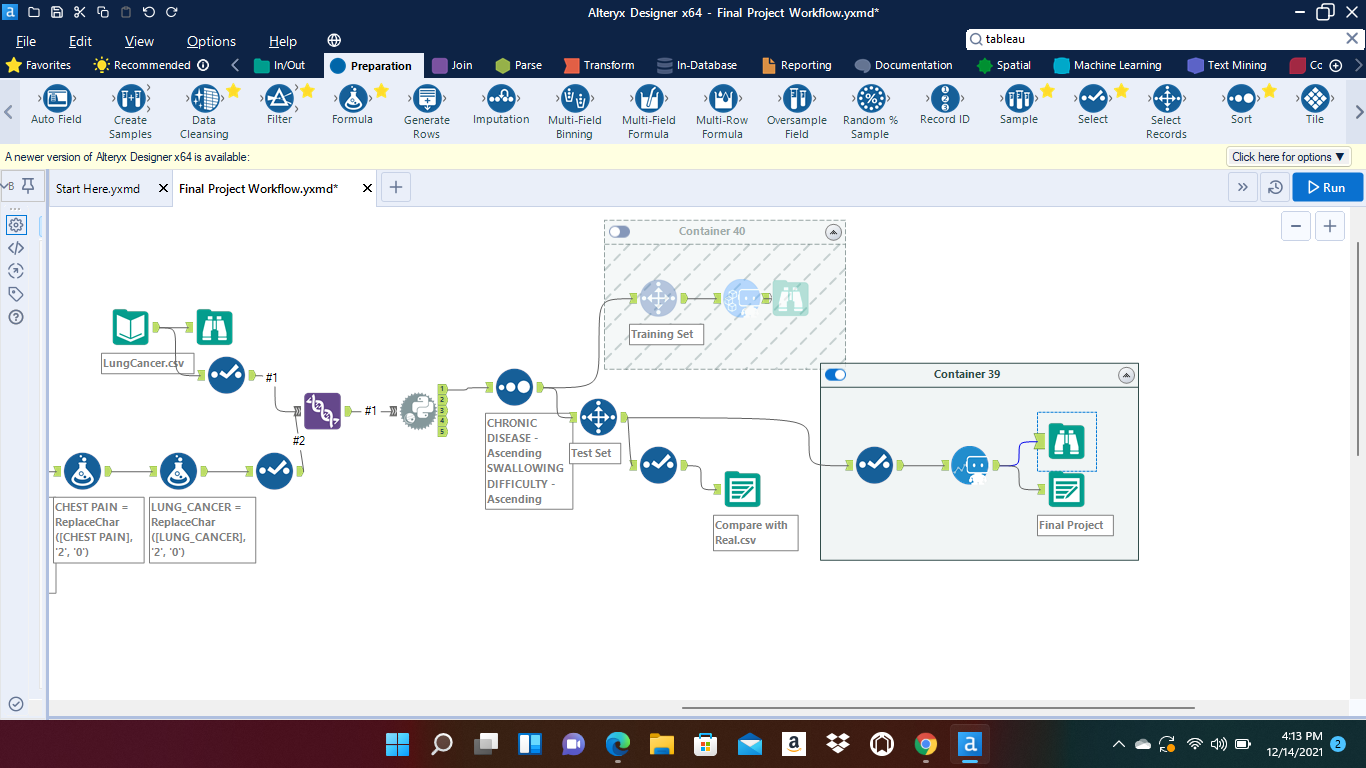

## Exploratory Data Analysis

In [ ]:
#import dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import MultipleLocator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
from scipy import stats


We start by importing all necessary dependencies. Downloading our data which is available via the raw GitHub links in the code below. Then we perform some basic EDA. 

In [ ]:
#import dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/Danjstr/AIM-5014/main/survey%20lung%20cancer.csv%253FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%40kaggle-161607.iam.gserviceaccount.com%252F20211213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20211213T091854Z%26X-Goog-Expires%3D259199%26X-Goog-SignedHe.csv')


In [ ]:
#import dataset from github
df0 = pd.read_csv('https://raw.githubusercontent.com/Danjstr/AIM-5014/main/lung_cancer_examples.csv%253FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%40kaggle-161607.iam.gserviceaccount.com%252F20211213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20211213T091809Z%26X-Goog-Expires%3D259199%26X-Goog-Signed.csv')


In [ ]:
df.head(50)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
df0.head(60)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,19,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,7,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [ ]:
df0.drop(['Name', 'Surname', 'Age', 'AreaQ'], axis = 1, inplace = True) 

In [ ]:
df.drop(['GENDER','AGE','ALCOHOL CONSUMING', 'SMOKING'], axis = 1, inplace = True) 

In [ ]:
df0.rename(columns={'Result':'LUNG_CANCER'},
          inplace=True, errors='raise')

In [ ]:
df['LUNG_CANCER'].replace(('YES', 'NO'), (0, 1), inplace=True)

In [ ]:
df= df.astype(str)

In [ ]:
df.replace(('2'), ('0'), inplace=True)

In [ ]:
df.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,1,1,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,0,0,0,0
2,1,1,0,1,0,1,0,0,0,1,0,1
3,0,0,1,1,1,1,1,1,1,0,0,1
4,0,1,1,1,1,1,0,0,0,1,1,1


In [ ]:
df0.head()

,Smokes,Alkhol,LUNG_CANCER
0,3,4,1
1,19,5,1
2,0,2,0
3,0,1,0
4,4,6,1


In [ ]:
'''df0['LUNG_CANCER'] = df0['LUNG_CANCER'].replace({0:1, 1:0})'''

"df0['LUNG_CANCER'] = df0['LUNG_CANCER'].replace({0:1, 1:0})"

In [ ]:
df0.head()

,Smokes,Alkhol,LUNG_CANCER
0,3,4,1
1,19,5,1
2,0,2,0
3,0,1,0
4,4,6,1


In [ ]:
df.dtypes

YELLOW_FINGERS           object
ANXIETY                  object
PEER_PRESSURE            object
CHRONIC DISEASE          object
FATIGUE                  object
ALLERGY                  object
WHEEZING                 object
COUGHING                 object
SHORTNESS OF BREATH      object
SWALLOWING DIFFICULTY    object
CHEST PAIN               object
LUNG_CANCER              object
dtype: object

In [ ]:
df=df.astype(int)

In [ ]:
df.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,1,1,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,0,0,0,0
2,1,1,0,1,0,1,0,0,0,1,0,1
3,0,0,1,1,1,1,1,1,1,0,0,1
4,0,1,1,1,1,1,0,0,0,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   YELLOW_FINGERS         309 non-null    int64
 1   ANXIETY                309 non-null    int64
 2   PEER_PRESSURE          309 non-null    int64
 3   CHRONIC DISEASE        309 non-null    int64
 4   FATIGUE                309 non-null    int64
 5   ALLERGY                309 non-null    int64
 6   WHEEZING               309 non-null    int64
 7   COUGHING               309 non-null    int64
 8   SHORTNESS OF BREATH    309 non-null    int64
 9   SWALLOWING DIFFICULTY  309 non-null    int64
 10  CHEST PAIN             309 non-null    int64
 11  LUNG_CANCER            309 non-null    int64
dtypes: int64(12)
memory usage: 29.1 KB


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Smokes       59 non-null     int64
 1   Alkhol       59 non-null     int64
 2   LUNG_CANCER  59 non-null     int64
dtypes: int64(3)
memory usage: 1.5 KB


In [ ]:
df0.head()

,Smokes,Alkhol,LUNG_CANCER
0,3,4,1
1,19,5,1
2,0,2,0
3,0,1,0
4,4,6,1


In [ ]:
df3 = pd.concat([df, df0])

In [ ]:
df3.head(50)

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Smokes,Alkhol
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,NaN,NaN
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,NaN,NaN
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,NaN,NaN
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,NaN,NaN
6,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN,NaN
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,NaN,NaN
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,NaN,NaN
9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,NaN,NaN


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 58
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YELLOW_FINGERS         309 non-null    float64
 1   ANXIETY                309 non-null    float64
 2   PEER_PRESSURE          309 non-null    float64
 3   CHRONIC DISEASE        309 non-null    float64
 4   FATIGUE                309 non-null    float64
 5   ALLERGY                309 non-null    float64
 6   WHEEZING               309 non-null    float64
 7   COUGHING               309 non-null    float64
 8   SHORTNESS OF BREATH    309 non-null    float64
 9   SWALLOWING DIFFICULTY  309 non-null    float64
 10  CHEST PAIN             309 non-null    float64
 11  LUNG_CANCER            368 non-null    int64  
 12  Smokes                 59 non-null     float64
 13  Alkhol                 59 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 43.1 KB


In [ ]:
#Perform K-nearest neighbors imputation
imputer = KNNImputer(n_neighbors=3)
df3 = imputer.fit_transform(df3[['YELLOW_FINGERS',	'ANXIETY',	'PEER_PRESSURE',	'CHRONIC DISEASE',	'WHEEZING',	'COUGHING',	'SHORTNESS OF BREATH',	'SWALLOWING DIFFICULTY', 'CHEST PAIN',	'LUNG_CANCER',	'Smokes',	'Alkhol']])

In [ ]:
df3 = pd.DataFrame(df3, columns=['YELLOW_FINGERS',	'ANXIETY',	'PEER_PRESSURE',	'CHRONIC DISEASE',	'WHEEZING',	'COUGHING',	'SHORTNESS OF BREATH',	'SWALLOWING DIFFICULTY', 'CHEST PAIN',	'LUNG_CANCER',	'Smokes',	'Alkhol'])

In [ ]:
df3.isnull().sum()

YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
WHEEZING                 0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
Smokes                   0
Alkhol                   0
dtype: int64

In [ ]:
df3.tail(50)

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Smokes,Alkhol
318,0.333333,0.666667,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,18.0,5.0
319,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.0,4.0,0.0
320,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.0,10.0,3.0
321,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.0,2.0,1.0
322,0.333333,0.666667,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,17.0,8.0
323,0.333333,0.666667,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,7.0,8.0
324,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.0,18.0,1.0
325,0.333333,0.666667,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,22.0,5.0
326,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.0,12.0,0.0
327,0.333333,0.666667,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,5.0,3.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YELLOW_FINGERS         368 non-null    float64
 1   ANXIETY                368 non-null    float64
 2   PEER_PRESSURE          368 non-null    float64
 3   CHRONIC DISEASE        368 non-null    float64
 4   WHEEZING               368 non-null    float64
 5   COUGHING               368 non-null    float64
 6   SHORTNESS OF BREATH    368 non-null    float64
 7   SWALLOWING DIFFICULTY  368 non-null    float64
 8   CHEST PAIN             368 non-null    float64
 9   LUNG_CANCER            368 non-null    float64
 10  Smokes                 368 non-null    float64
 11  Alkhol                 368 non-null    float64
dtypes: float64(12)
memory usage: 34.6 KB


In [ ]:
#Round the result of the imputation to whole numbers
df3['YELLOW_FINGERS'] = df3['YELLOW_FINGERS'].round(0)
df3['ANXIETY'] = df3['ANXIETY'].round(0)
df3['PEER_PRESSURE'] = df3['PEER_PRESSURE'].round(0)
df3['CHRONIC DISEASE'] = df3['CHRONIC DISEASE'].round(0)
df3['WHEEZING'] = df3['WHEEZING'].round(0)
df3['SHORTNESS OF BREATH'] = df3['SHORTNESS OF BREATH'].round(0)
df3['SWALLOWING DIFFICULTY'] = df3['SWALLOWING DIFFICULTY'].round(0)
df3['CHEST PAIN'] = df3['CHEST PAIN'].round(0)
df3['LUNG_CANCER'] = df3['LUNG_CANCER'].round(0)
df3['COUGHING'] = df3['COUGHING'].round(0)
df3['Smokes'] = df3['Smokes'].round(0)

In [ ]:
df3.tail()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Smokes,Alkhol
363,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0
364,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,19.0,4.0
365,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,15.0,5.0
366,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0,8.0
367,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0


In [ ]:
df=df3

In [ ]:
#Show the count of all negative values
df[df < 0].count()

YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
WHEEZING                 0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
Smokes                   0
Alkhol                   0
dtype: int64

In [ ]:
#Show the count of all values that equal zero
df[df == 0].count()

YELLOW_FINGERS           235
ANXIETY                  154
PEER_PRESSURE            155
CHRONIC DISEASE          187
WHEEZING                 231
COUGHING                 238
SHORTNESS OF BREATH      257
SWALLOWING DIFFICULTY    176
CHEST PAIN               231
LUNG_CANCER              301
Smokes                   273
Alkhol                     8
dtype: int64

In [ ]:
#Show the count of all values that equal one
df[df == 1].count()

YELLOW_FINGERS           133
ANXIETY                  214
PEER_PRESSURE            213
CHRONIC DISEASE          181
WHEEZING                 137
COUGHING                 130
SHORTNESS OF BREATH      111
SWALLOWING DIFFICULTY    192
CHEST PAIN               137
LUNG_CANCER               67
Smokes                     0
Alkhol                   278
dtype: int64

In [ ]:
#Show the count of all values that equal two
df[df == 2 ].count()

YELLOW_FINGERS            0
ANXIETY                   0
PEER_PRESSURE             0
CHRONIC DISEASE           0
WHEEZING                  0
COUGHING                  0
SHORTNESS OF BREATH       0
SWALLOWING DIFFICULTY     0
CHEST PAIN                0
LUNG_CANCER               0
Smokes                    3
Alkhol                   10
dtype: int64

Good, so we finally have all our data cleaned up in python. Comparatively speaking, it was easier in Altreyx to do this step. While we had to program everything out here in this notebook. In Altreyx, we set up a string of formulas that let us make a lot of small changes one after another in a controlled fashion. The string of Formula tools might look intimidating when looking at the workflow but it is really quite intuitive. Far simpler than coding out those same changes in python.


In [ ]:
df['LUNG_CANCER'].value_counts()

0.0    301
1.0     67
Name: LUNG_CANCER, dtype: int64

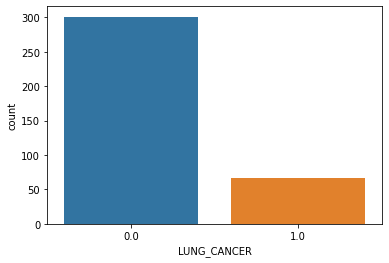

In [ ]:
sns.countplot(x="LUNG_CANCER", data=df)

In [ ]:
df['CHEST PAIN'].value_counts()

0.0    231
1.0    137
Name: CHEST PAIN, dtype: int64

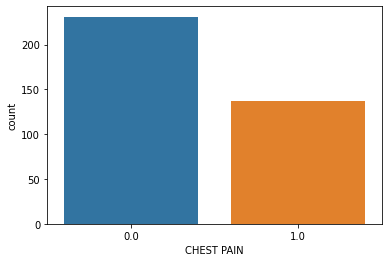

In [ ]:
sns.countplot(x="CHEST PAIN", data=df)

In [ ]:
df['SWALLOWING DIFFICULTY'].value_counts()

1.0    192
0.0    176
Name: SWALLOWING DIFFICULTY, dtype: int64

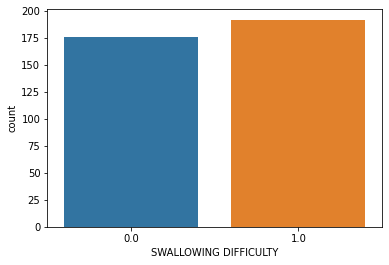

In [ ]:
sns.countplot(x="SWALLOWING DIFFICULTY", data=df)

In [ ]:
df['SHORTNESS OF BREATH'].value_counts()

0.0    257
1.0    111
Name: SHORTNESS OF BREATH, dtype: int64

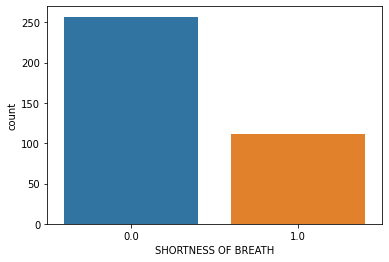

In [ ]:
sns.countplot(x="SHORTNESS OF BREATH", data=df)

In [ ]:
df['COUGHING'].value_counts()

0.0    238
1.0    130
Name: COUGHING, dtype: int64

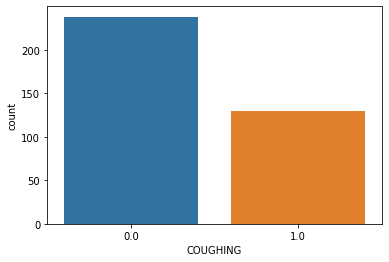

In [ ]:
sns.countplot(x="COUGHING", data=df)

In [ ]:
df['WHEEZING'].value_counts()

0.0    231
1.0    137
Name: WHEEZING, dtype: int64

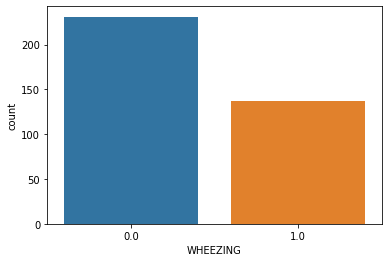

In [ ]:
sns.countplot(x="WHEEZING", data=df)

In [ ]:
df['CHRONIC DISEASE'].value_counts()

0.0    187
1.0    181
Name: CHRONIC DISEASE, dtype: int64

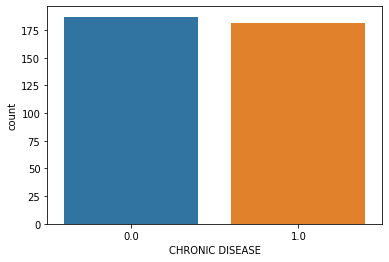

In [ ]:
sns.countplot(x="CHRONIC DISEASE", data=df)

In [ ]:
df['PEER_PRESSURE'].value_counts()

1.0    213
0.0    155
Name: PEER_PRESSURE, dtype: int64

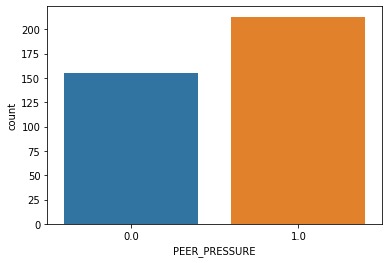

In [ ]:
sns.countplot(x="PEER_PRESSURE", data=df)

In [ ]:
df['ANXIETY'].value_counts()

1.0    214
0.0    154
Name: ANXIETY, dtype: int64

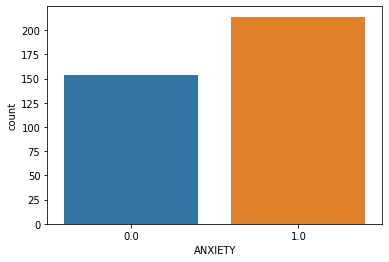

In [ ]:
sns.countplot(x="ANXIETY", data=df)

In [ ]:
df['YELLOW_FINGERS'].value_counts()

0.0    235
1.0    133
Name: YELLOW_FINGERS, dtype: int64

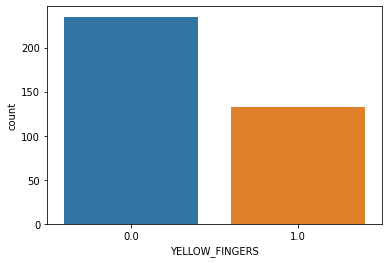

In [ ]:
sns.countplot(x="YELLOW_FINGERS", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd16d116810>,
      dtype=object)

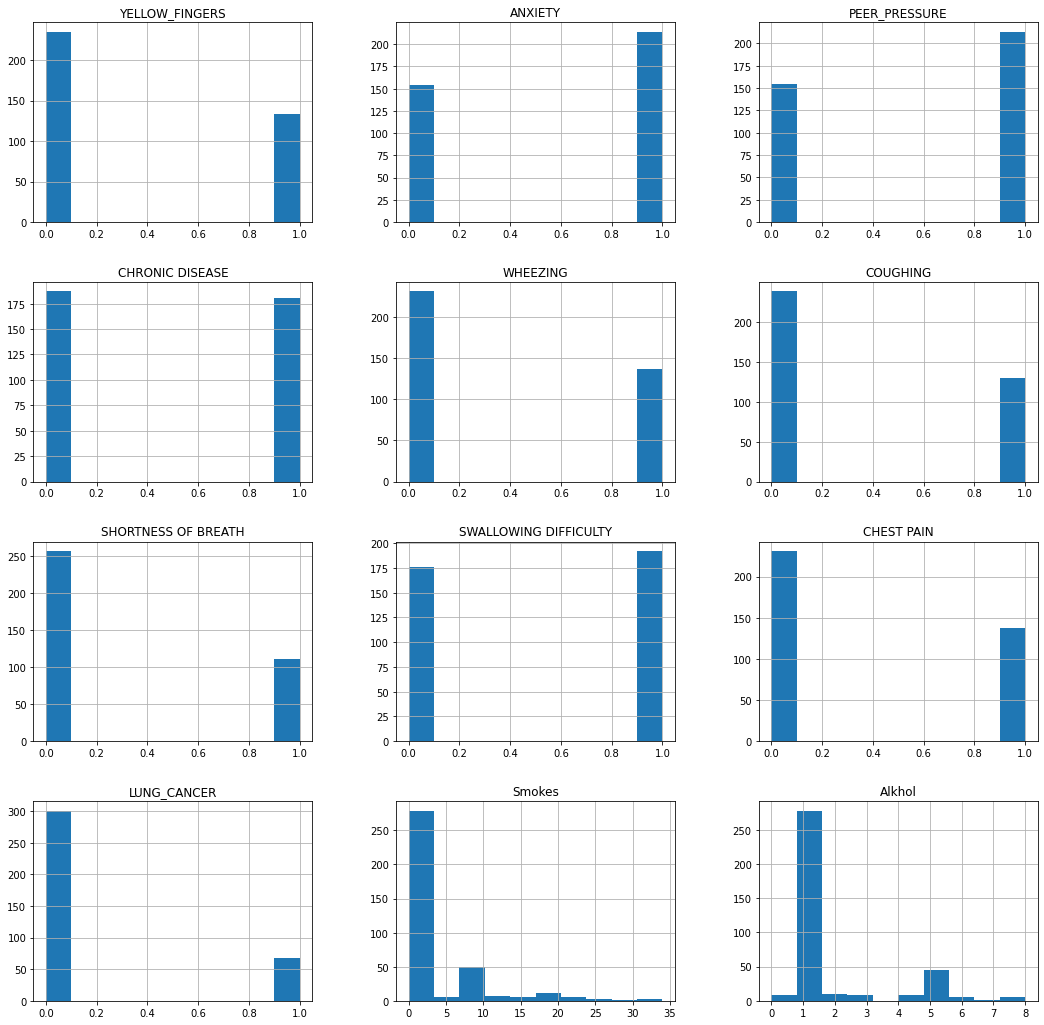

In [ ]:
df.hist(figsize=(18,18))

Text(0.5, 1.0, 'Smokes')

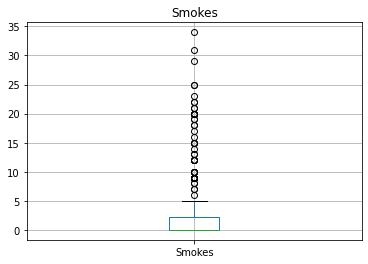

In [ ]:
df.boxplot(column=['Smokes'], return_type='axes');
plt.title("Smokes")

Text(0.5, 1.0, 'Alkhol')

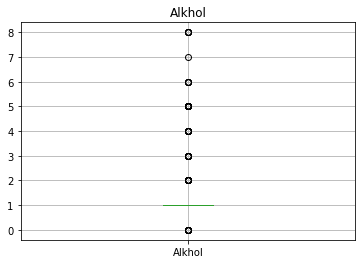

In [ ]:

df.boxplot(column=['Alkhol'], return_type='axes');
plt.title("Alkhol")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YELLOW_FINGERS         368 non-null    float64
 1   ANXIETY                368 non-null    float64
 2   PEER_PRESSURE          368 non-null    float64
 3   CHRONIC DISEASE        368 non-null    float64
 4   WHEEZING               368 non-null    float64
 5   COUGHING               368 non-null    float64
 6   SHORTNESS OF BREATH    368 non-null    float64
 7   SWALLOWING DIFFICULTY  368 non-null    float64
 8   CHEST PAIN             368 non-null    float64
 9   LUNG_CANCER            368 non-null    float64
 10  Smokes                 368 non-null    float64
 11  Alkhol                 368 non-null    float64
dtypes: float64(12)
memory usage: 34.6 KB


In [ ]:
df.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Smokes,Alkhol
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,9.0,5.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,5.0


### Relationship


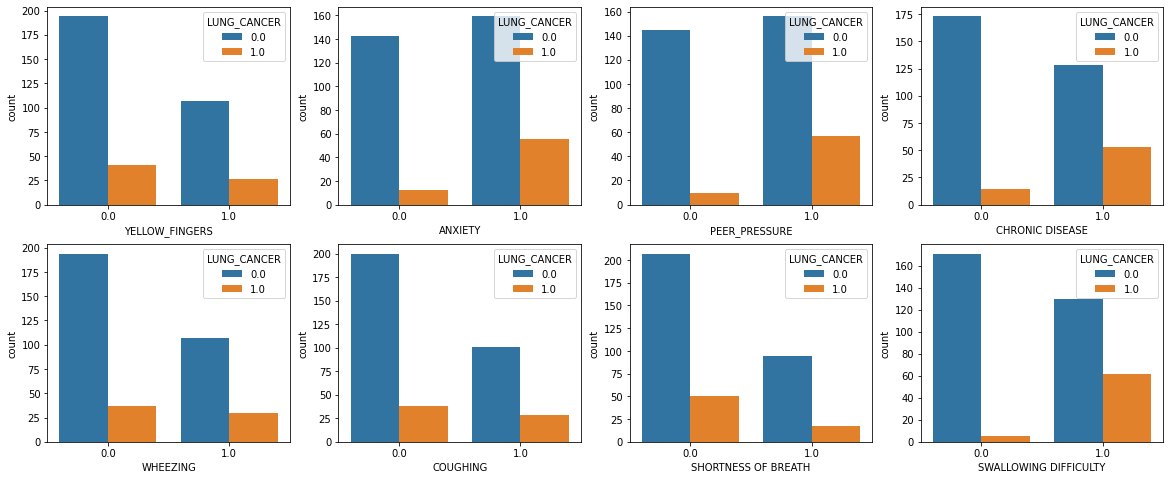

In [ ]:
#Relationship of categorical and Fasting Blood Sugar 
fig, axes =plt.subplots(2,4, figsize=(20,8)) 
axes = axes.flatten()
cat = ['YELLOW_FINGERS',	'ANXIETY',	'PEER_PRESSURE',	'CHRONIC DISEASE',	'WHEEZING',	'COUGHING',	'SHORTNESS OF BREATH',	'SWALLOWING DIFFICULTY', 'CHEST PAIN',	'LUNG_CANCER']
for ax, countplot in zip(axes, df.dtypes[cat].index):
    sns.countplot(x=countplot,hue='LUNG_CANCER', data=df, ax=ax) 
plt.show()

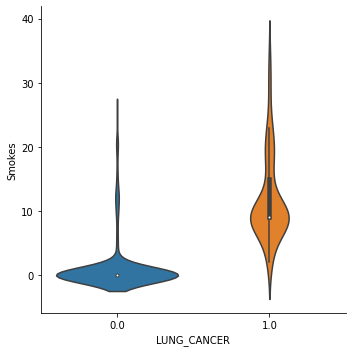

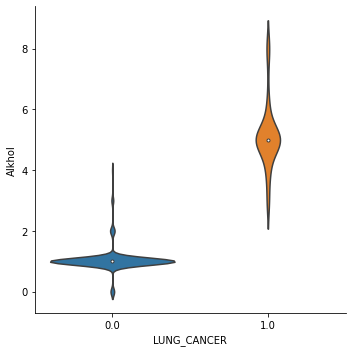

In [ ]:
#Relationship of continuous and Fasting Blood Sugar 
cont = ['Smokes',	'Alkhol']
for ax, boxplot in zip(axes, df.dtypes[cont].index): 
    sns.catplot(x="LUNG_CANCER", y=boxplot, kind=("violin"), data=df)
plt.tight_layout()  
plt.show()

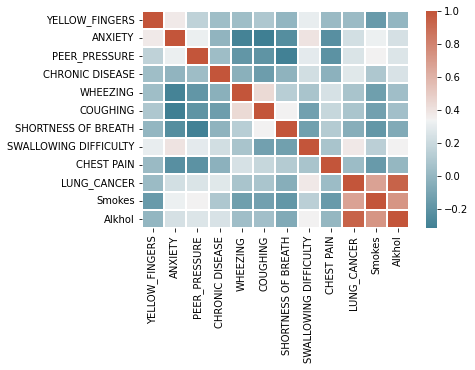

In [ ]:
#plot the heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Feature Elimination

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.20
to_drop = [column for column in upper.columns if any(upper[column] > 0.20)]


In [ ]:
df.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Smokes,Alkhol
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,9.0,5.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,5.0


In [ ]:
cat = ['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']

A quick look at the correlation Heatmap shows us that next our numerical variables are correlated. This means they may not serve us all that well for predictive purposes. Still, this is a small dataset so we won't have any problems running them as features alongside the more predictive categorical variables. 

It should be noted that in Datarobot the predictive power of each variable is automatically analysed and features selected without the user needing to do anything. 



In [ ]:
df=df.drop_duplicates()

In [ ]:
df.tail()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Smokes,Alkhol
362,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0
363,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0
364,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,19.0,4.0
366,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0,8.0
367,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0


## Feature Scaling

For our feature scaling, we chose a standard scaler for all of our continuous numerical variables. The StandardScaler removes the mean and scales the data.

We will also be providing results for all the same models run using the MinMaxScaler for comparison purposes. This comparison will be available in the model selection section,

For our Categorical varaibles. With the exception of our response variable 'Lung_Cancer' we used one-hot encoding. One hot encoding allows us to use categorical variables as binary vectors with each value represented by a zero except the index of the integer, which is marked with a 1.

Again, for our Altreyx permutation, this would have been largely handled under the hood by all the models trained by Datarobot.

In [ ]:
#Scale our Continous data using StandardScaler
scaled = StandardScaler().fit_transform(df[cont]) 

#One Hot encode the catecorical variables
one_hot = OneHotEncoder(sparse = False).fit_transform(df[cat])

#Set up your explorotory variables in a datframe
X = np.concatenate([scaled, one_hot], axis = 1)

#Seperate your response variable
y = df["LUNG_CANCER"]


In [ ]:
y=y.astype('int')

In [ ]:
from imblearn.over_sampling import SMOTE
#Fix Class imbalances
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

We do have some imbalanced classes in the data set that need to be dealt with. We will be applying SMOTE here to resolve this issue. 

Altreyx is a different story there isn't a feature set aside for class imbalance. Theoretically, we could have dealt with this using the python tool to add the Smote to our Altreyx workflow thereby eliminating the class imbalance there. Still, the objective is to show a comparison between the two permutations of this build. If I program everything in Altreyx then it would hardly make a good comparison. So I decided to run the Altreyx, Datarobot pipeline with the class imbalance in place.

## Machine Learning Modles

In [ ]:
#Split the data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.85, random_state = 35)

In [ ]:
y_test

194    1
0      0
95     0
211    1
140    0
      ..
18     0
162    1
170    1
160    0
219    1
Name: LUNG_CANCER, Length: 196, dtype: int64

Split the data into Training and Test sets using the traditional method here in this notebook. In Altreyx we used two select record tools so that we could split the data for training and test sets.

In [ ]:
# Create empty lists for model Metrics

precision = []
accuracy = []
recall = []
f1_scores = []
auc =[]
cross_validation_score =[]

In [ ]:
# Create empty data frame for model Metrics
overview = pd.DataFrame()
overview[''] = ['KNN1','KNN2','KNN3', 'XG Boost1','XG Boost2','XG Boost3']


K-nearest Neighbor 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
y_pred_knn = knn.predict(X_test)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

0.9666666666666666
[[91 13]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       104
           1       0.88      1.00      0.93        92

    accuracy                           0.93       196
   macro avg       0.94      0.94      0.93       196
weighted avg       0.94      0.93      0.93       196



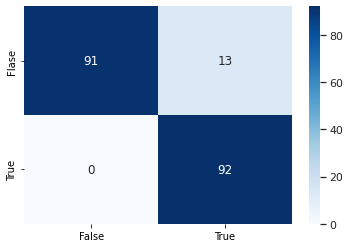

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_knn)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_knn)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_knn)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_knn)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_knn)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
scores = cross_val_score(knn2, X_train, y_train, cv=10, scoring='accuracy')
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_knn2))
print(classification_report(y_test,y_pred_knn2))

0.9666666666666666
[[91 13]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       104
           1       0.88      1.00      0.93        92

    accuracy                           0.93       196
   macro avg       0.94      0.94      0.93       196
weighted avg       0.94      0.93      0.93       196



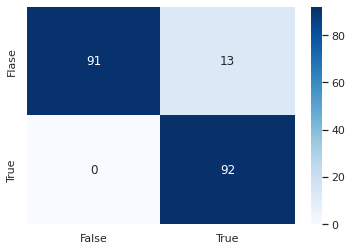

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn2)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_knn2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_knn2)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_knn2)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_knn2)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_knn2)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn3 = KNeighborsClassifier(n_neighbors = 15)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
scores = cross_val_score(knn3, X_train, y_train, cv=10, scoring='accuracy')
y_pred_knn3 = knn3.predict(X_test)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_knn3))
print(classification_report(y_test,y_pred_knn3))

0.9666666666666666
[[87 17]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       104
           1       0.84      1.00      0.92        92

    accuracy                           0.91       196
   macro avg       0.92      0.92      0.91       196
weighted avg       0.93      0.91      0.91       196



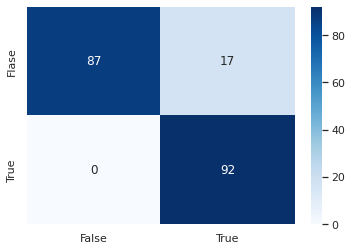

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn3)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_knn3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_knn3)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_knn3)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_knn3)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_knn3)))
cross_validation_score.append(scores.mean())

XG Boost 1

In [ ]:
#Train and fit your classifier
xgb = XGBClassifier(max_depth= 8, n_estimators= 150, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.02, max_depth=8, n_estimators=150, n_jobs=5,
              random_state=35)

In [ ]:
scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='accuracy')
y_pred_xgb = xgb.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

0.9166666666666666
[[103   1]
 [  7  85]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       104
           1       0.99      0.92      0.96        92

    accuracy                           0.96       196
   macro avg       0.96      0.96      0.96       196
weighted avg       0.96      0.96      0.96       196



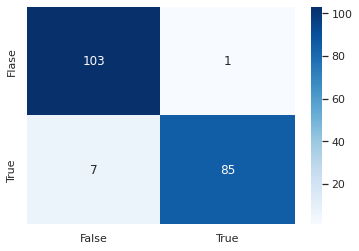

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_xgb)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_xgb)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_xgb)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_xgb)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_xgb)))
cross_validation_score.append(scores.mean())

XG Boost 2

In [ ]:
#Train and fit your classifier
xgb2 = XGBClassifier(max_depth= 5, n_estimators= 100, random_state= 35,  learning_rate= 0.03, n_jobs=5)

xgb2.fit(X_train, y_train)

XGBClassifier(learning_rate=0.03, max_depth=5, n_jobs=5, random_state=35)

In [ ]:
scores = cross_val_score(xgb2, X_train, y_train, cv=10, scoring='accuracy')
y_pred_xgb2 = xgb2.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_xgb2))
print(classification_report(y_test,y_pred_xgb2))

0.9166666666666666
[[103   1]
 [  7  85]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       104
           1       0.99      0.92      0.96        92

    accuracy                           0.96       196
   macro avg       0.96      0.96      0.96       196
weighted avg       0.96      0.96      0.96       196



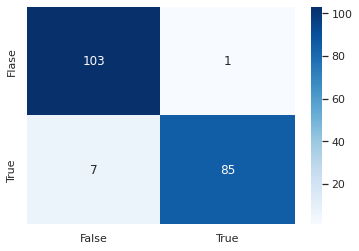

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb2)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_xgb2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_xgb2)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_xgb2)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_xgb2)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_xgb2)))
cross_validation_score.append(scores.mean())

XG Boost 3

In [ ]:
#Train and fit your classifier
xgb3 = XGBClassifier(max_depth= 15, n_estimators= 200, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb3.fit(X_train, y_train)

XGBClassifier(learning_rate=0.02, max_depth=15, n_estimators=200, n_jobs=5,
              random_state=35)

In [ ]:
scores = cross_val_score(xgb3, X_train, y_train, cv=10, scoring='accuracy')
y_pred_xgb3 = xgb3.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_xgb3))
print(classification_report(y_test,y_pred_xgb3))

0.9166666666666666
[[103   1]
 [  7  85]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       104
           1       0.99      0.92      0.96        92

    accuracy                           0.96       196
   macro avg       0.96      0.96      0.96       196
weighted avg       0.96      0.96      0.96       196



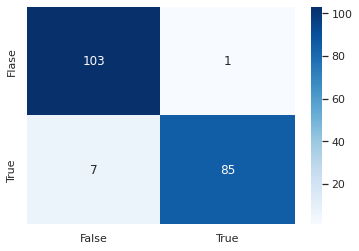

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb3)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_xgb3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_xgb3)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_xgb3)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_xgb3)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_xgb3)))
cross_validation_score.append(scores.mean())

## Model Selection

Finally, our best model in this notebook was the KNN1. It was the first K nearest neighbor model that we ran.

This stands directly against our best performing model in Datarobot a Light Gradient Boosted Tree Classifier. The model we programmed here turned out better than the model we returned from Datarobot. That however is likely a result of the class imbalances that we left in our dataset in Altreyx.

If Smote was used I imagine the results would have likely matched or surpassed any hand-built models.



In [ ]:
#Show an overview of all model's performance
overview['Precision'] = precision
overview['Accuracy'] = accuracy
overview['Recall'] = recall
overview['F1_score'] = f1_scores
overview['auc_score'] = auc
overview['Mean Cross Val Score'] = cross_validation_score

overview

,,Precision,Accuracy,Recall,F1_score,auc_score,Mean Cross Val Score
0,KNN1,0.876190,0.933673,1.000000,0.934010,0.937500,0.966667
1,KNN2,0.876190,0.933673,1.000000,0.934010,0.937500,0.966667
2,KNN3,0.844037,0.913265,1.000000,0.915423,0.918269,0.966667
3,XG Boost1,0.988372,0.959184,0.923913,0.955056,0.957149,0.916667
4,XG Boost2,0.988372,0.959184,0.923913,0.955056,0.957149,0.916667
5,XG Boost3,0.988372,0.959184,0.923913,0.955056,0.957149,0.916667


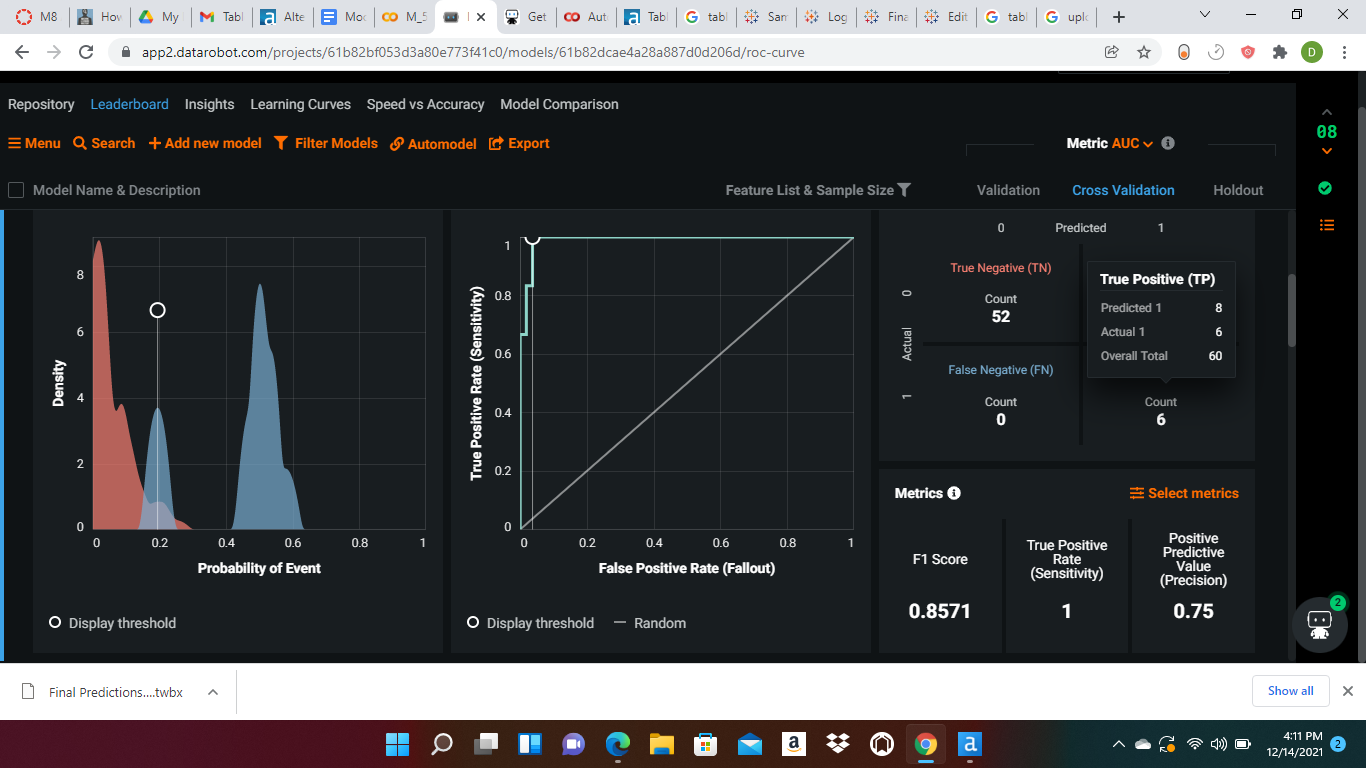

In [ ]:
#Run our preferred model on the test set
y_pred = knn.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['LUNG_CANCER'])
y_test = pd.DataFrame(y_test, columns=['LUNG_CANCER'])



As we have decided that 'KNN1' is our best model. We shall be running it against the test set to confirm how well our preferred model runs overall. The bar charts show the predictions of our preferred model the 'KNN1' against the test set. The results are fairly decent. There is no notable discrepancy between the prediction and our test data. Implying that our model is efficient at predictions.

Using the Datarobot Predict tool we did the same on our test set in Altreyx. We ran the data we held back through the prediction model we developed in Datarobot. The results of the returned predictions were again not as good as the models we made here in this notebook. But that is likely a result of the class imbalance we left in the dataset.

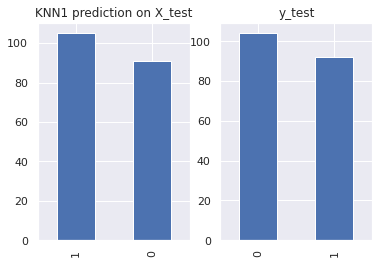

In [ ]:
#Create the bar plots for the model run on the test set
plt.subplot(1,2,1)
y_pred.LUNG_CANCER.value_counts().plot(kind='bar');
plt.title('KNN1 prediction on X_test')

plt.subplot(1,2,2)
y_test.LUNG_CANCER.value_counts().plot(kind='bar');
plt.title('y_test')
plt.show();

plt.show()

In summary, We needed to transform and adjust the data both in this notebook and in Altreyx. We then focused on imputing the data in other permutations of this build. Finally, we built models for both permutations. 

The models we built were superior in this notebook, but not by much. Considering the amount of time that went into building the two separate permutations. I would say the Altreyx, Datarobot pipeline was superior. It took a quarter the time to get it finished compared with this python notebook. 

In terms of performance. I would still choose the pipeline over this notebook. Because the python tool allows for the direct application of code when necessary. So if Altreyx ever falls short you can directly program things in as you would in any other Jupyter Notebook.

In fact, python functions more as a support tool with Altreyx than it does as the main tool used to build the models.

If I had to pick one over the other I would say the pipeline while underperforming in this instance outperforms in almost every real-world scenario. It saves Time which employers pay their employees for. It is less technical and more user-friendly which means you don't need to know how to program to work with Altreyx. This means basic work can be done by other employees leaving more time free for Data science or machine teams.

For basic data science and machine learning work, Altreyx and Datarobot are must-have tools. That significantly reduces workload, provides flexibility, and potentially superior model results when compared to traditional coding done in a Jupyter notebook.

There is also a great deal more an automated pipeline can do than is shown in this notebook. Running hundreds of models to find the best one in a pipeline is easy. You set it up and run it. Go have dinner, go home, sleep. The next morning you will have hundreds of models to pick from. You cannot do the same in python. You run what you build and nothing more. That means if you spend a week pulling all-nighters putting in 70 to hours to build and tune the perfect model you will likely still fall short of the guy who builds a model last-minute runs it in an automated pipeline overnight and just selects the best model in the morning.

On a single project for an individual Altreyx and Datarobot save hours. For a company they save Money. A lot of it.


***Research Question:*** Can we effectively predict if a person has Lung Cancer?  We will be building two separate models? 

***Answer:*** Yes, for both the models built here and in our pipeline we returned results with Precision, Accuracy, Recall, and F1-score of over 80%.

This means we can tell patients with reasonable certainty that we could predict with over 80% accuracy if they have lung cancer. This can be done with reasonable certainty with any of the models we built in either permutation of our build.




https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

https://stackoverflow.com/questions/63673517/how-can-i-fix-the-value-error-issue-tensorflow

https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c

https://scikit-learn.org/stable/modules/ensemble.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

https://stackoverflow.com/questions/59839782/confusion-matrix-font-size

https://www.jeremyjordan.me/evaluating-a-machine-learning-model/